In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

In [3]:
boston_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv"
boston_df = pd.read_csv(boston_url)

# Variables descriptions

1. **CRIM** - per capita crime rate by town
1. **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
1. **INDUS** - proportion of non-retail business acres per town.
1. **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
1. **NOX** - nitric oxides concentration (parts per 10 million)
1. **RM** - average number of rooms per dwelling
1. **AGE** - proportion of owner-occupied units built prior to 1940
1. **DIS** - weighted distances to five Boston employment centres
1. **RAD** - index of accessibility to radial highways
1. **TAX** - full-value property-tax rate per USD 10,000
1. **PTRATIO** - pupil-teacher ratio by town
1. **LSTAT** - % lower status of the population
1. **MEDV** - Median value of owner-occupied homes in USD 1000's

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Task 4: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

- For the "Median value of owner-occupied homes" provide a boxplot
- Provide a  bar plot for the Charles river variable
- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
- Create a histogram for the pupil to teacher ratio variable

## Boxplot for "Median value of owner-occupied homes"

Text(0.5, 1.0, 'Median Values of Owner-occupied homes')

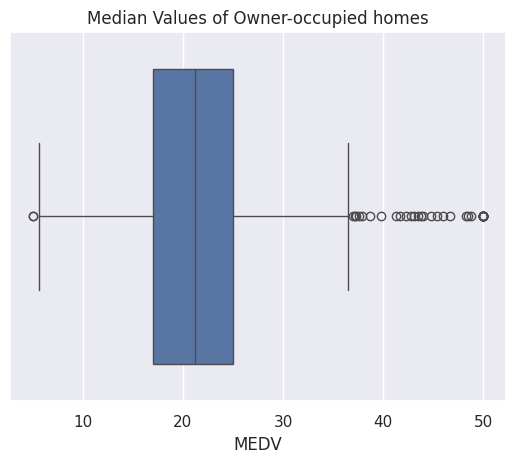

In [6]:
sns.boxplot(x="MEDV", data=boston_df)
plt.title("Median Values of Owner-occupied homes")

There seems to be many outliers.

## Bar plot for the Charles river variable

Text(0.5, 12.44444444444443, 'Charles River: 1 if tract bounds river; 0 otherwise')

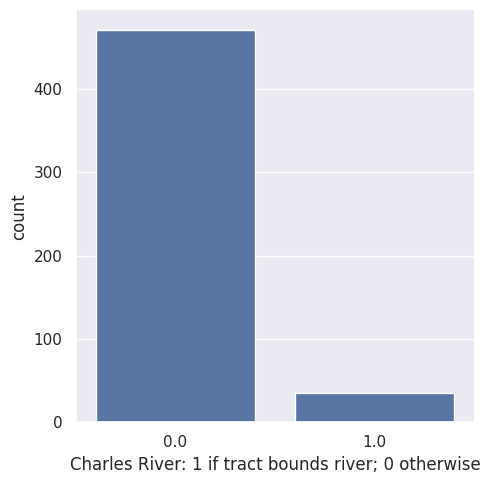

In [7]:
sns.catplot(x="CHAS", kind="count", data=boston_df)
plt.xlabel("Charles River: 1 if tract bounds river; 0 otherwise")

Most of the cases are with tract not bounding the river. There is an imbalance in the data.

## Boxplot for the MEDV variable vs the AGE variable

Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0, 0.5, 'Median Value')

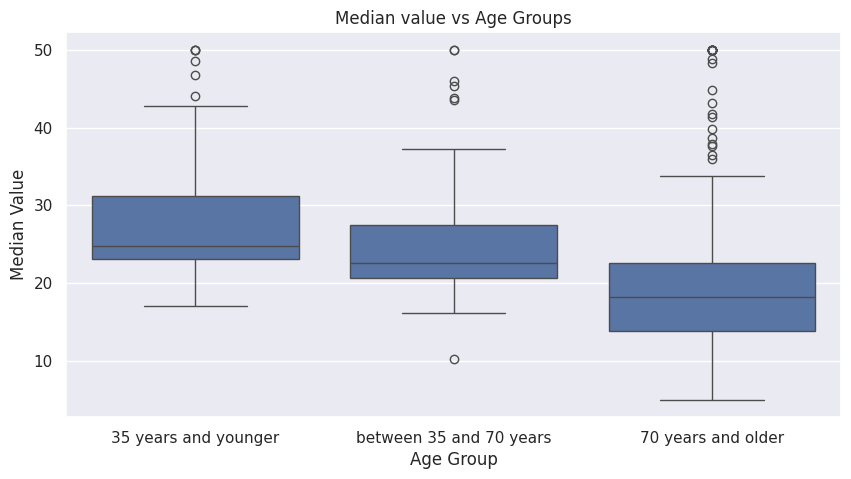

In [8]:
# GROUPS (0,35], (35,70], (70,110]. min age=2.9, max age=100, this is why 0 and 110 work
boston_df["AGE_GROUP"] = pd.cut(
    boston_df["AGE"],
    bins=[0, 35, 70, 110],
    labels=["35 years and younger", "between 35 and 70 years", "70 years and older"],
)

sns.set(rc={"figure.figsize": (10, 5)})
sns.boxplot(x="AGE_GROUP", y="MEDV", data=boston_df)
plt.title("Median value vs Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Median Value")

There seems to be a downward trend with the age: the older the lower the median value.

## Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

Text(0, 0.5, 'Proportion of Non-retail Business Acres')

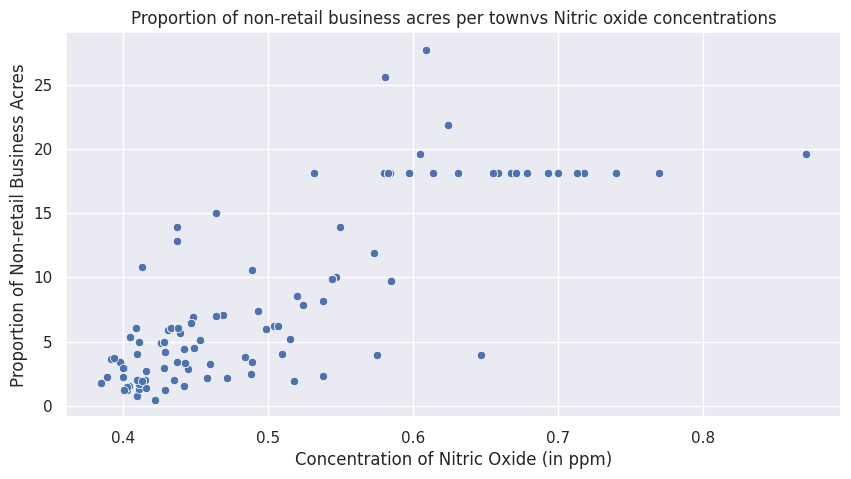

In [9]:
sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
plt.title("Proportion of non-retail business acres per townvs Nitric oxide concentrations")
plt.xlabel("Concentration of Nitric Oxide (in ppm)")
plt.ylabel("Proportion of Non-retail Business Acres")

It seems that there are 2 regimes:
 - a somewhat linear relationship till ca. 0.6 ppm
 - a constant relationship after 0.6 ppm

## Histogram for the pupil to teacher ratio variable

Text(0.5, 0, 'Pupil to Teacher Ratio')

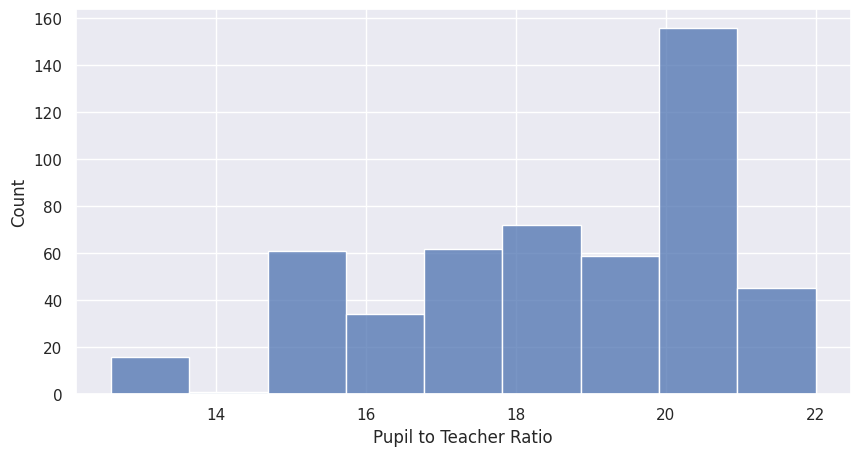

In [10]:
sns.histplot(data=boston_df, x="PTRATIO", binwidth=1)
plt.xlabel("Pupil to Teacher Ratio")

There is concentrations between 18 and 21.

# Task 5: Use the appropriate tests to answer the questions provided

For each of the following questions;

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

1. State your hypothesis.
2. Use α = 0.05
3. Perform the test Statistics.
4. State the conclusion from the test.

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

**Hypothesis**
 - $H_0: µ_1 = µ_2$ ("there is no difference in between the median value of houses bounded by Charles river and not bounded.")
 - $H_a: µ_1 ≠ µ_2$ ("there is a difference in between the median value of houses bounded by Charles river and not bounded.")

The Levenes's test tests the null hypothesis that all input samples are from populations with equal variances

In [11]:
ss.levene(
    boston_df[boston_df["CHAS"] == 0]["MEDV"],
    boston_df[boston_df["CHAS"] == 1]["MEDV"],
    center="mean",
)

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

With an $alpha = 0.05$ and p-value of ~ 0.0032 we reject the null hypothesis that the samples have equal variances.

In [12]:
ss.ttest_ind(
    boston_df[boston_df.CHAS == 1].MEDV,
    boston_df[boston_df.CHAS == 0].MEDV,
    equal_var=False,
)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

<div style = "background:#b7e4c7">

**Conclusion:** Since the p-value (~ 7.4e-05) is less than 0.05 ($alpha = 0.05$), we reject the null hypothesis as there is enough proof that there is a statistical difference in Median value of owner-occupied homes based on Charles river variable
    
</div>

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

**Hypothesis**
 - $H_0: µ_1 = µ_2 = µ_3$ ("There is no difference in median values of houses for occupied units built prior to 1940.")
 - $H_a:$ ("There is a difference in median values of houses for occupied units built prior to 1940.")

In [13]:
ss.levene(
    boston_df[boston_df["AGE_GROUP"] == "35 years and younger"]["MEDV"],
    boston_df[boston_df["AGE_GROUP"] == "between 35 and 70 years"]["MEDV"],
    boston_df[boston_df["AGE_GROUP"] == "70 years and older"]["MEDV"],
    center="mean",
)

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

With an $alpha = 0.05$ and p-value of ~ 0.06 we cannot reject the null hypothesis that the samples have equal variances

In [14]:
thirtyfive_younger = boston_df[boston_df["AGE_GROUP"] == "35 years and younger"]["MEDV"]
thirtyfive_seventy = boston_df[boston_df["AGE_GROUP"] == "between 35 and 70 years"]["MEDV"]
seventy_older = boston_df[boston_df["AGE_GROUP"] == "70 years and older"]["MEDV"]

In [15]:
f_statistic, p_value = ss.f_oneway(thirtyfive_younger, thirtyfive_seventy, seventy_older)
print(f"F_Statistic: {f_statistic}, P-Value: {p_value}")

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


<div style = "background:#b7e4c7">

**Conclusion:** Since the p-value (~ 1.7e-15) is less than 0.05 ($alpha = 0.05$), we reject the null hypothesis as there is a significant evidence that at least one of the means differs
    
</div>

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**Hypothesis**
 - $H_0:$ There is no relationship between Nitric Oxide concentration and proportion of non-retail business acres per town
 - $H_a:$ There is a relationship between Nitric Oxide concentration and proportion of non-retail business acres per town

In [16]:
ss.pearsonr(boston_df["NOX"], boston_df["INDUS"])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

<div style = "background:#b7e4c7">
    
**Conclusion:** Since the p-value (~ 8e-98) is less than 0.05 ($alpha = 0.05$), we reject the null hypothesis as there is a significant evidence that  there is a relationship between Nitric Oxide concentration and proportion of non-retail business acres per town

</div>   

## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

**Hypothesis**
 - $H_0:$ There is no impact of weighted distance to the five Boston employment centres on the median value of owner occupied homes
 - $H_a:$ There is an impact of weighted distance to the five Boston employment centres on the median value of owner occupied homes

In [17]:
X = boston_df["DIS"]
y = boston_df["MEDV"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           1.21e-08
Time:                        19:49:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div style = "background:#b7e4c7">
    
**Conclusion:** Since the p-value is less than 0.05 ($alpha = 0.05$), we reject the null hypothesis as there is a significant evidence that there is an impact of weighted distance to the five Boston employment centres on the median value of owner occupied homes

</div>   